# Explore

* Data exploration is the art of looking at your data, rapidly generating hypotheses, quickly testing them, then repeating the process again and again and again.
* Explore = Transform + Visualize
    - Transform = filter key observations, select important variables & create new ones and compute summaries.
    - Visualize = create plots with your available data.

## Data Visualisation

* There are multiple systems for making graphs in R, but ggplot2 is one of the most elegant and extendible ones.
* ggplot stands for grammar of graphics.
* Read more about the [theoretical underpinnings](http://vita.had.co.nz/papers/layered-grammar.pdf) of the ggplot library.

In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
# Function to change plot size
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

In [3]:
head(ggplot2::mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


**MPG Variables**
* Use `?mpg` to find out about other variables
* displ: car's engine size, in litres (L)
* hwy: car's fuel efficiency on the highway, in miles per gallon (mpg)
* drv: car's drivetrain type (f,r,4)

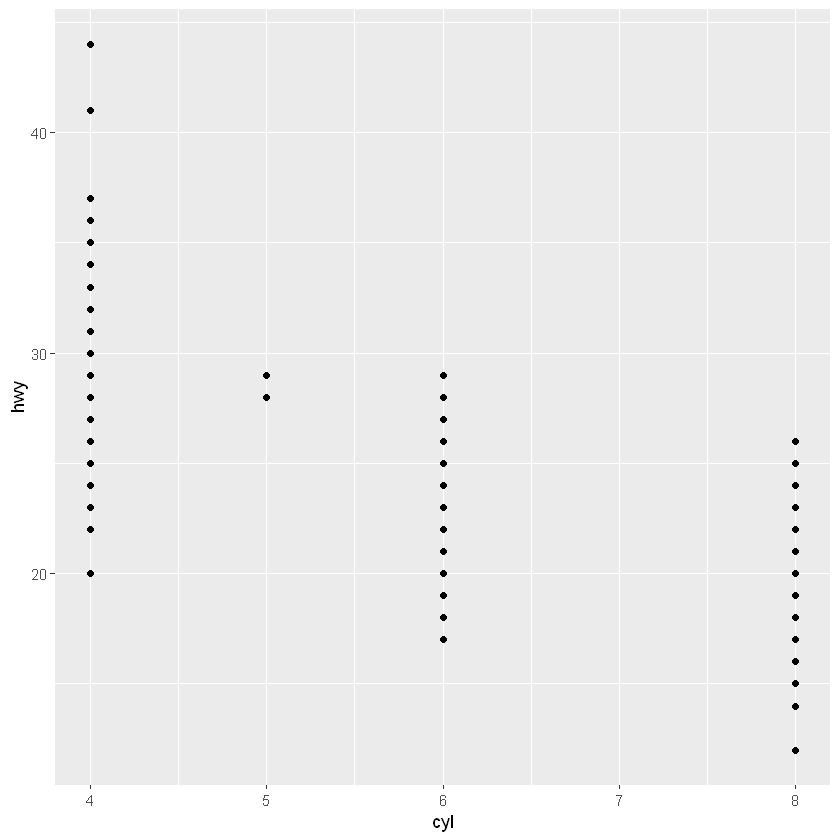

In [4]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=cyl,y=hwy))

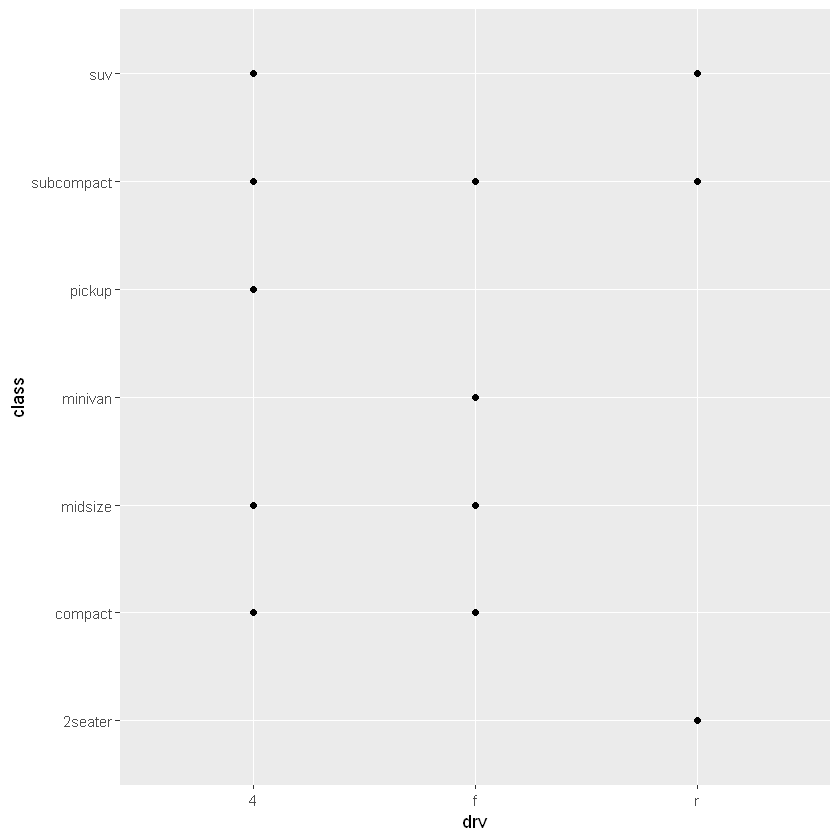

In [5]:
# This is not really useful because the variables are NOT numerical
ggplot(data=mpg) +
    geom_point(mapping=aes(x=drv,y=class))

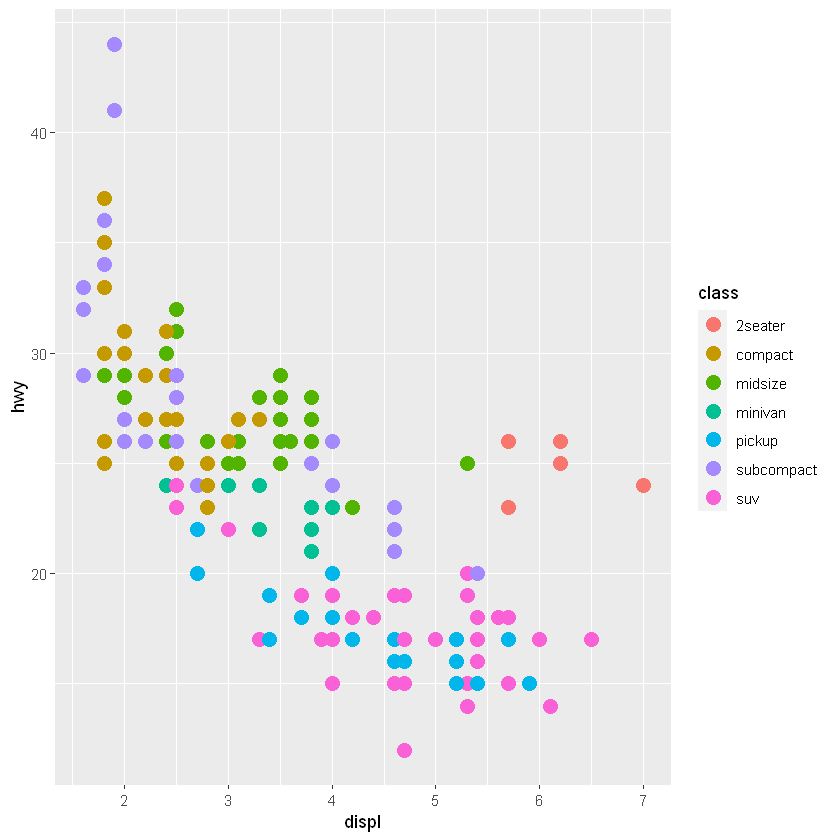

In [6]:
ggplot(data=mpg) + 
    geom_point(mapping=aes(x=displ,y=hwy,color=class),size=4)

The colors reveal that many of the unusual points are two-seater cars. These cars don’t seem like hybrids, and are, in fact, sports cars! Sports cars have large engines like SUVs and pickup trucks, but small bodies like midsize and compact cars, which improves their gas mileage. In hindsight, these cars were unlikely to be hybrids since they have large engines.

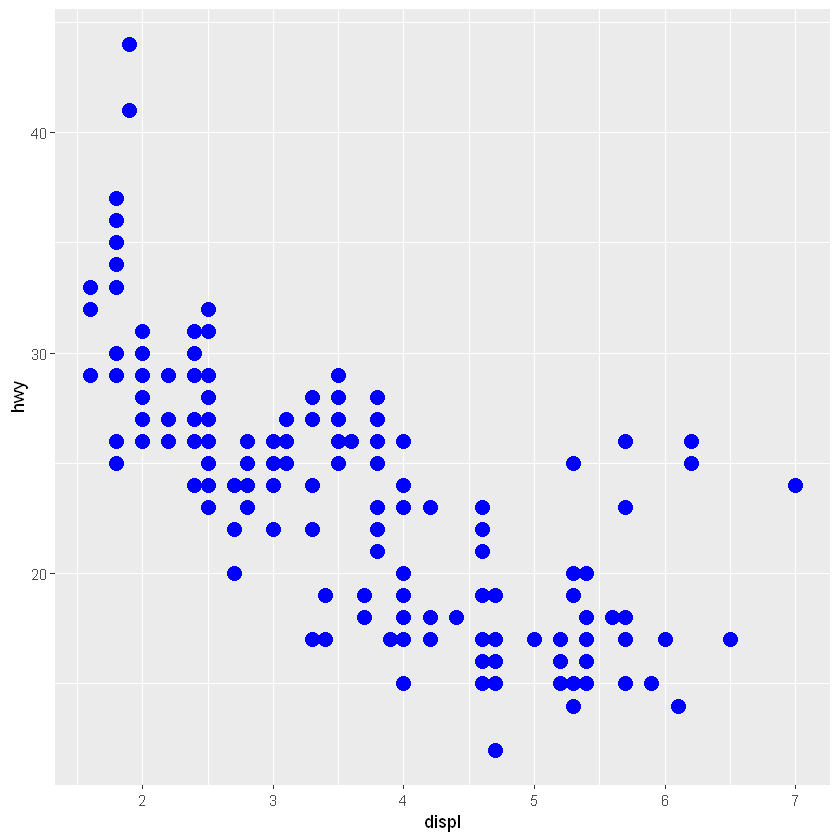

In [7]:
ggplot(data=mpg) + 
    geom_point(mapping=aes(x=displ,y=hwy),color='blue',size=4)

**Categorical Variables in mpg data set**
* manufacturer: self explanatory
* model: self explanatory
* trans: type of transmission
* drv: type of drivetrain 
* fl: fuel type
* class: type of the car

**Numerical variables in mpg data set**
- Continuous
    * displ: engine displacement in litres
- Discrete
    * year: self explanatory
    * cyl: number of cylinders
    * cty: city mpg
    * hwy: highway mpg

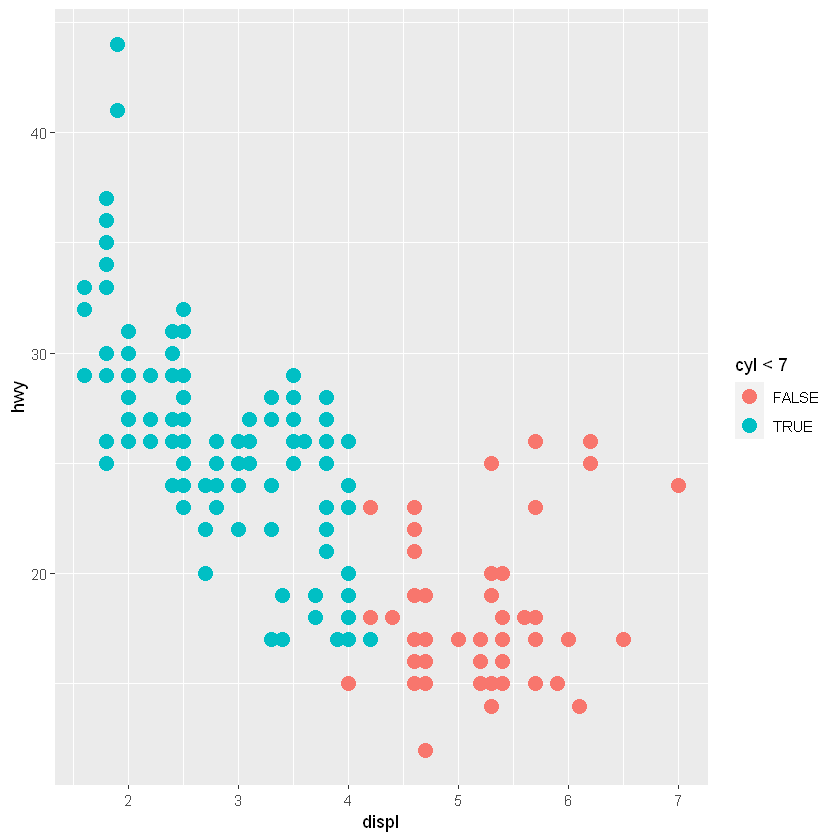

In [8]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy,color=cyl<7),size=4)

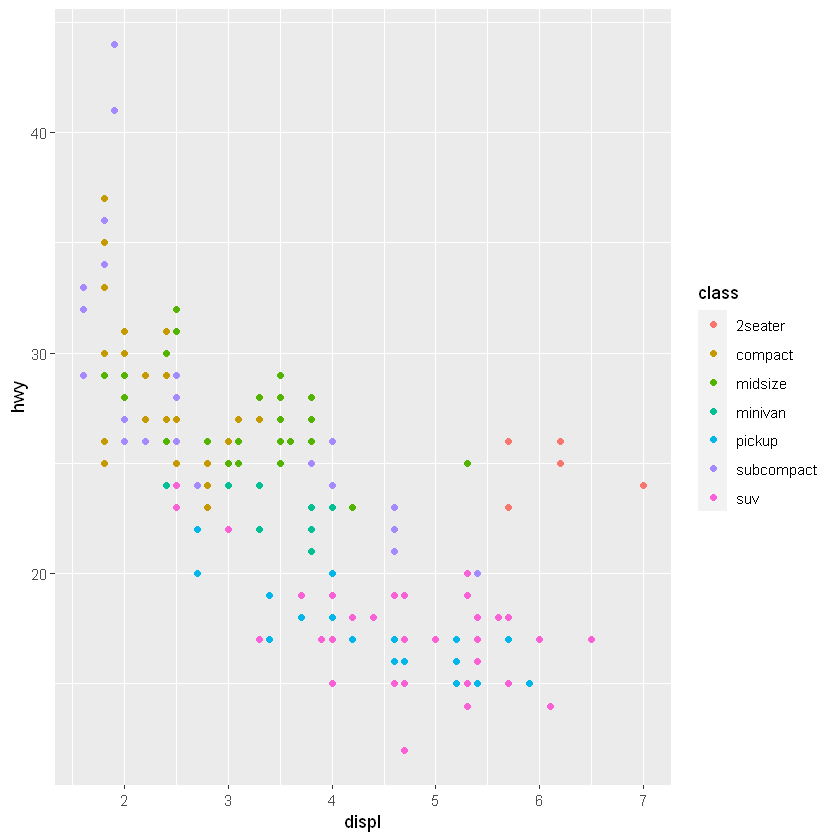

In [9]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy,color=class))

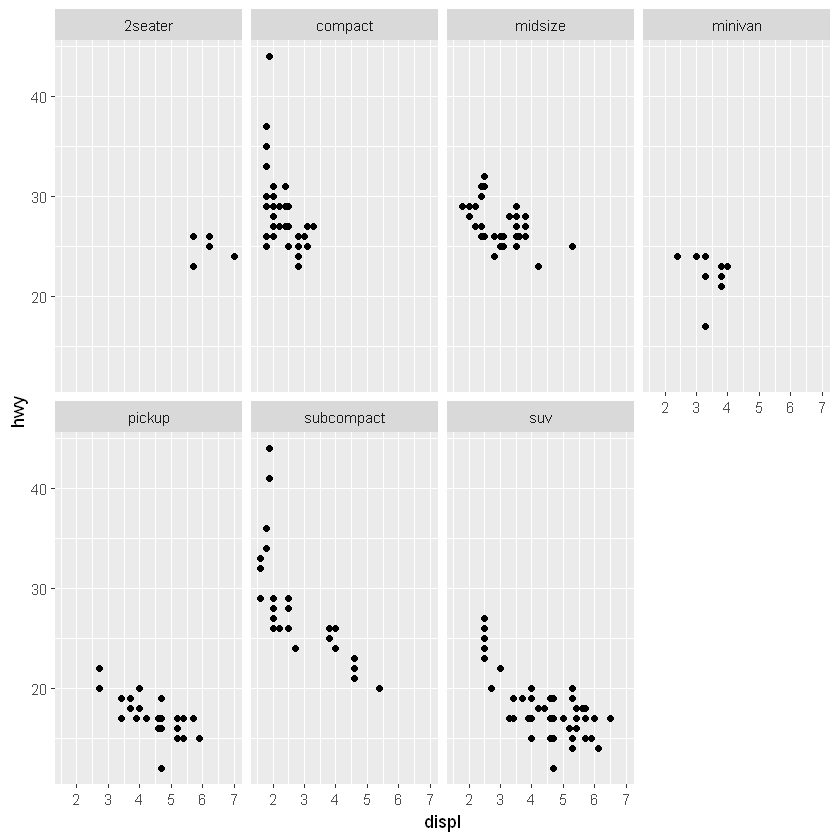

In [10]:
# Breaking down the above plots into facets (works with categorical variables)
# Every facet displays one subset of the data
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy)) +
    facet_wrap(~class,nrow=2)

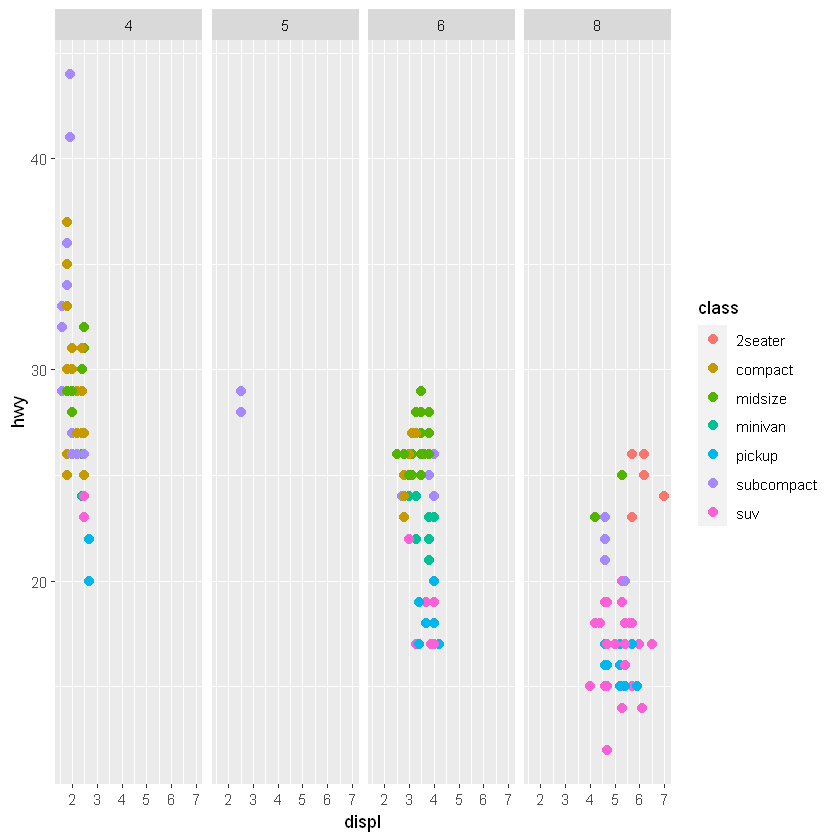

In [11]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy,color=class),size=2.5) +
    facet_grid(.~cyl)

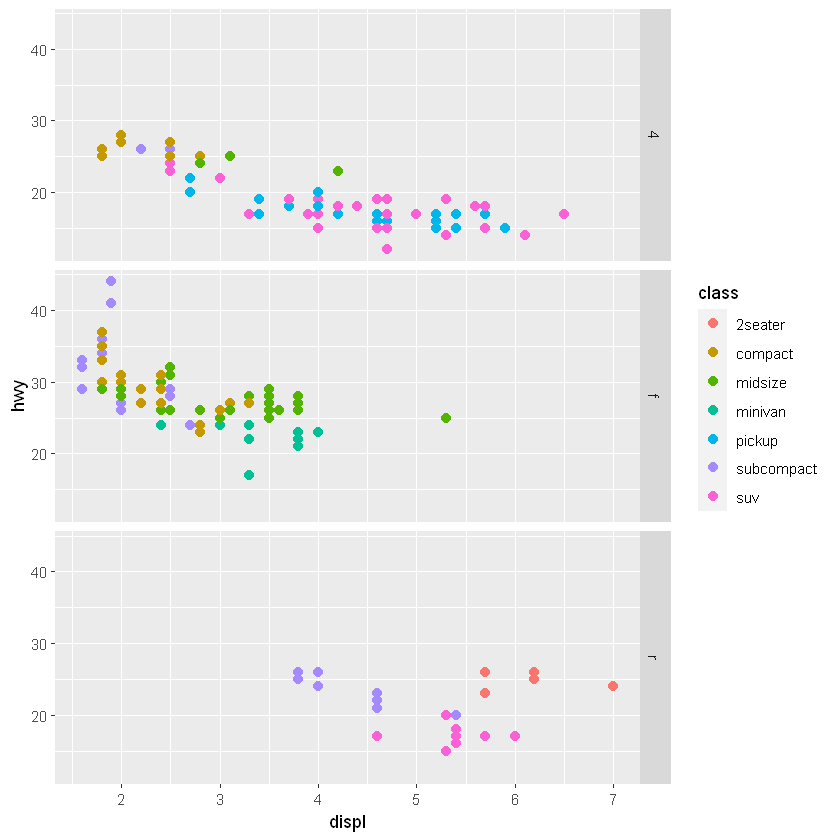

In [12]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy,color=class),size=2.5) +
    facet_grid(drv~.)

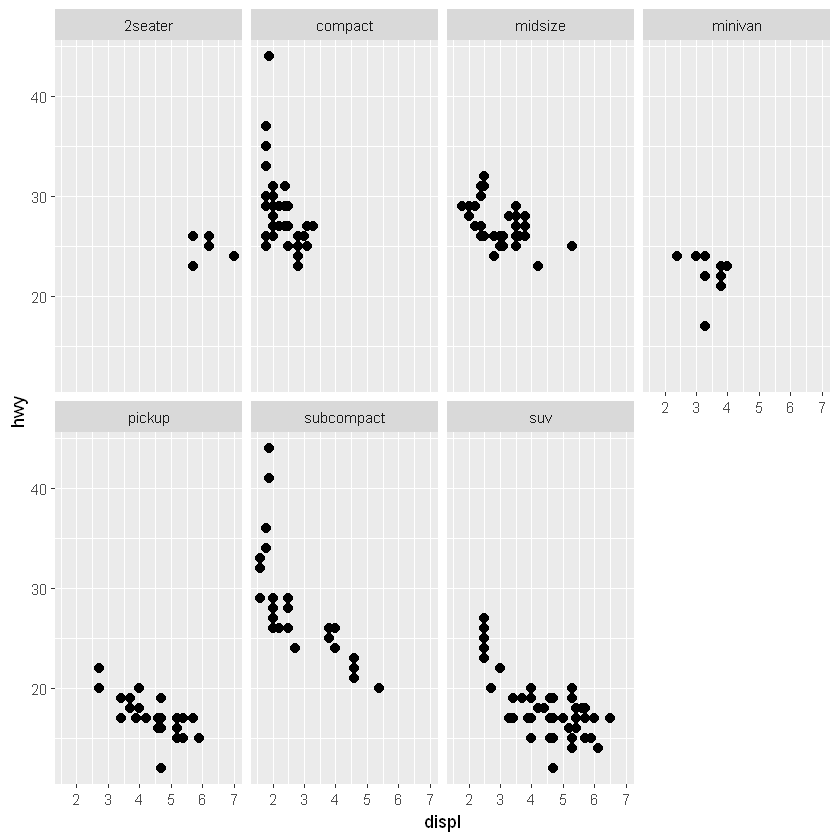

In [13]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy),size=2.5) +
    facet_wrap(~class,nrow=2)

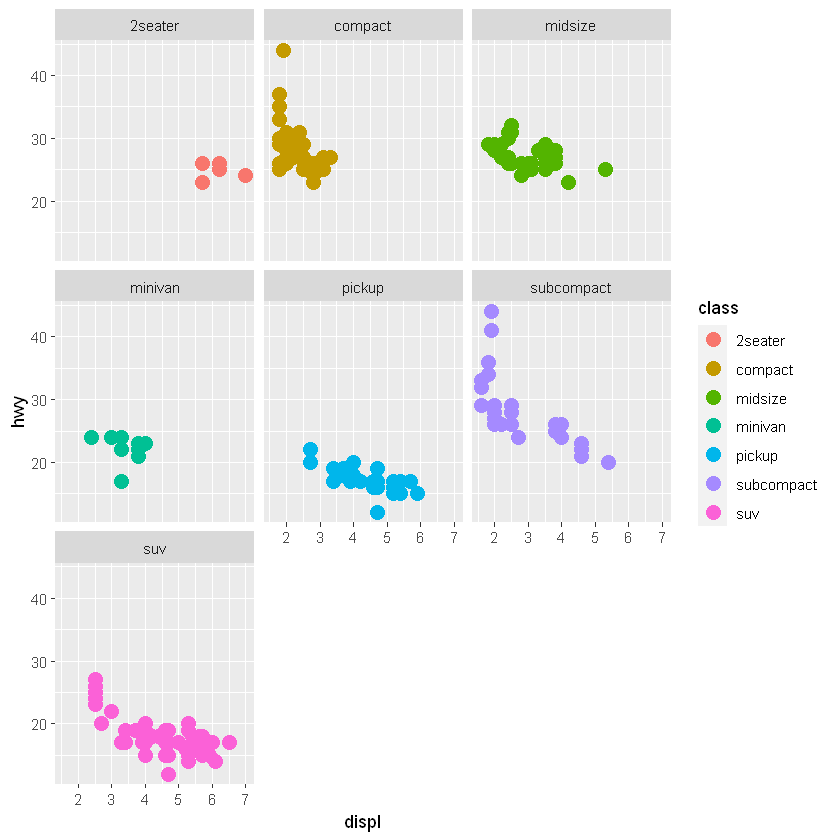

In [14]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy,color=class),size=4) +
    facet_wrap(~class)

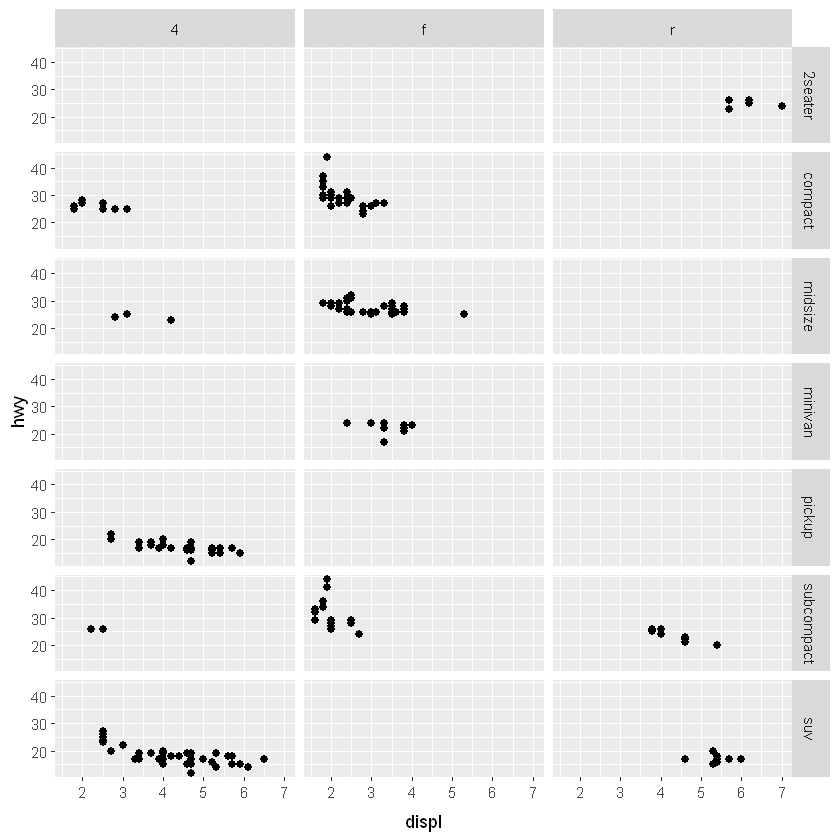

In [15]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy),size=2) +
    facet_grid(class~drv)

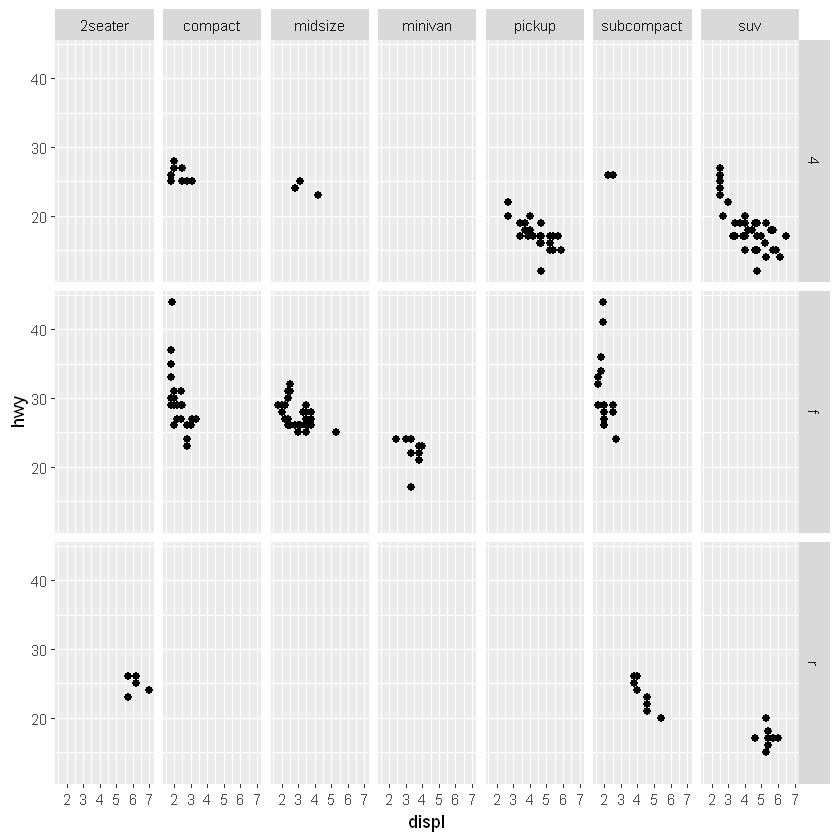

In [16]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy),size=2) +
    facet_grid(drv~class)

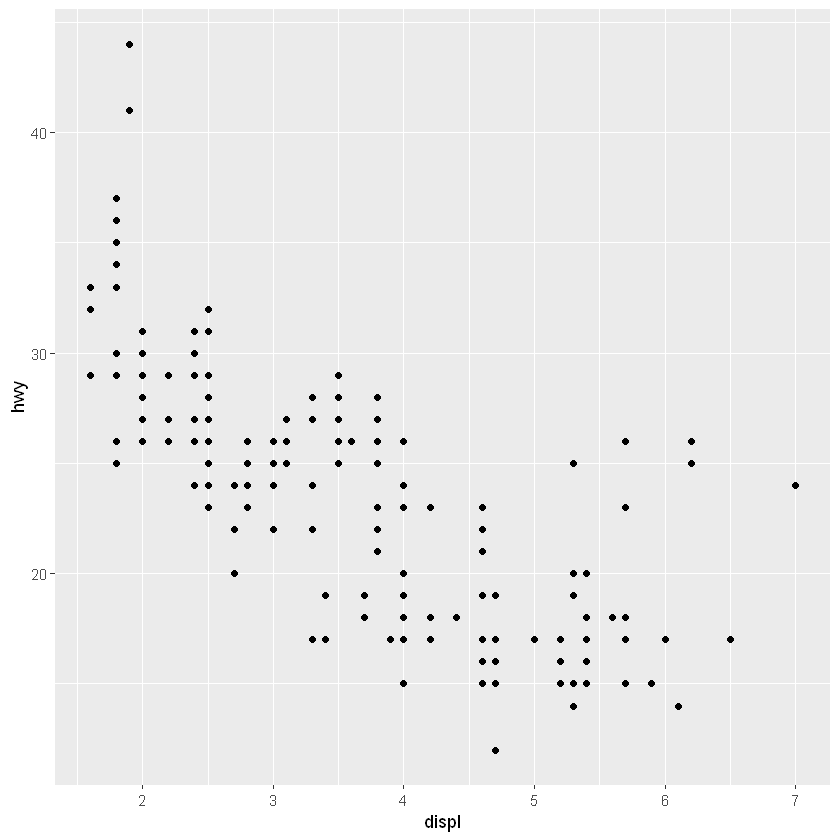

In [17]:
ggplot(data=mpg) +
    geom_point(mapping=aes(x=displ,y=hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



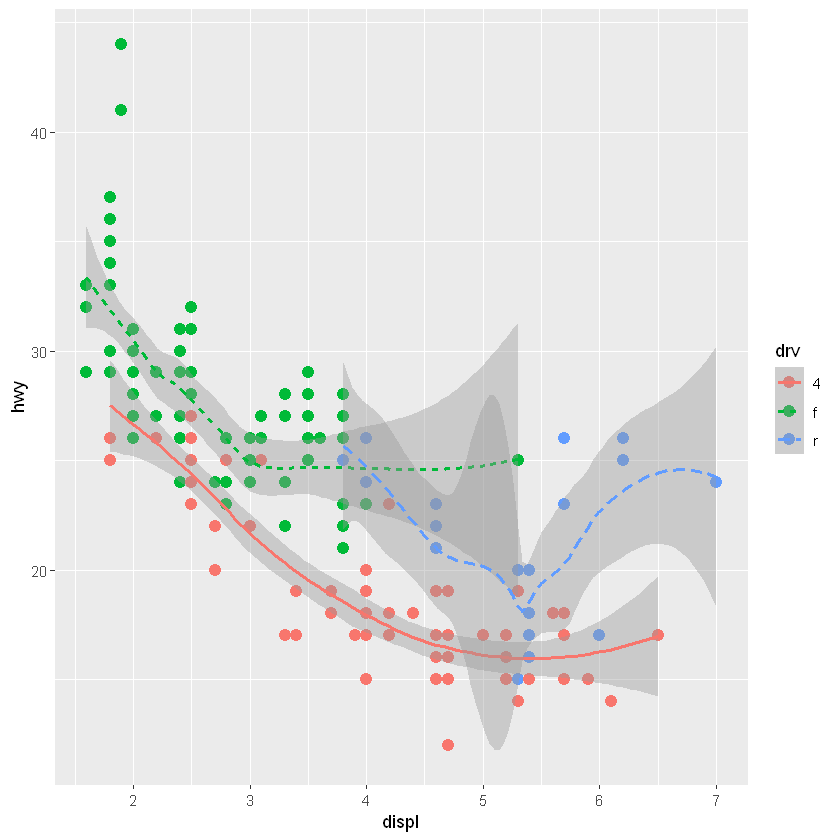

In [18]:
ggplot(data=mpg, aes(x=displ,y=hwy,color=drv,linetype=drv)) +
    geom_point(size=3) +
    geom_smooth()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



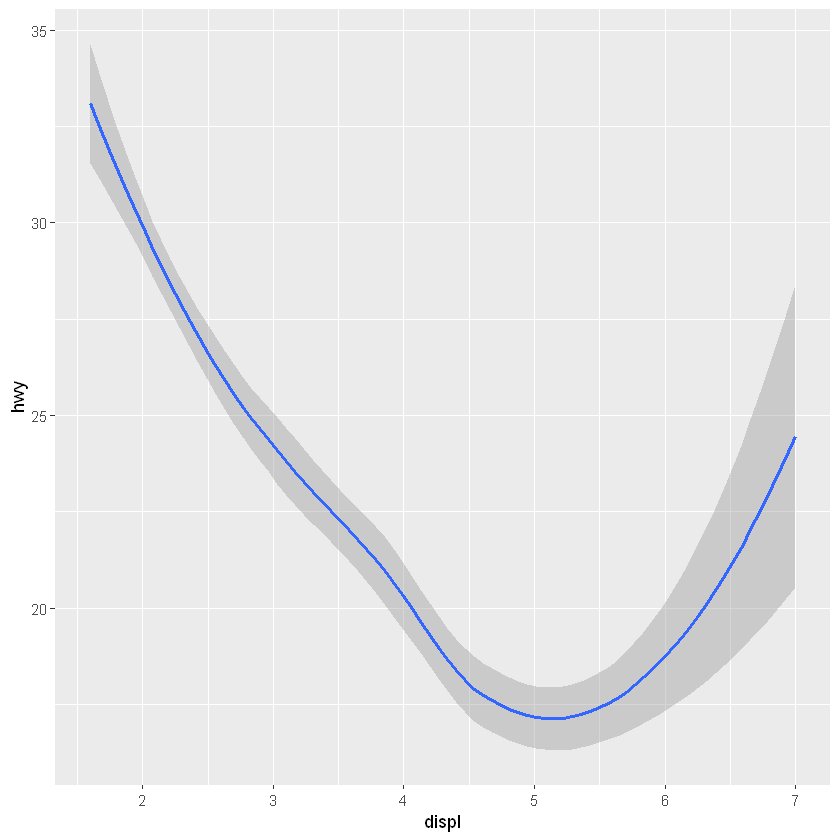

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



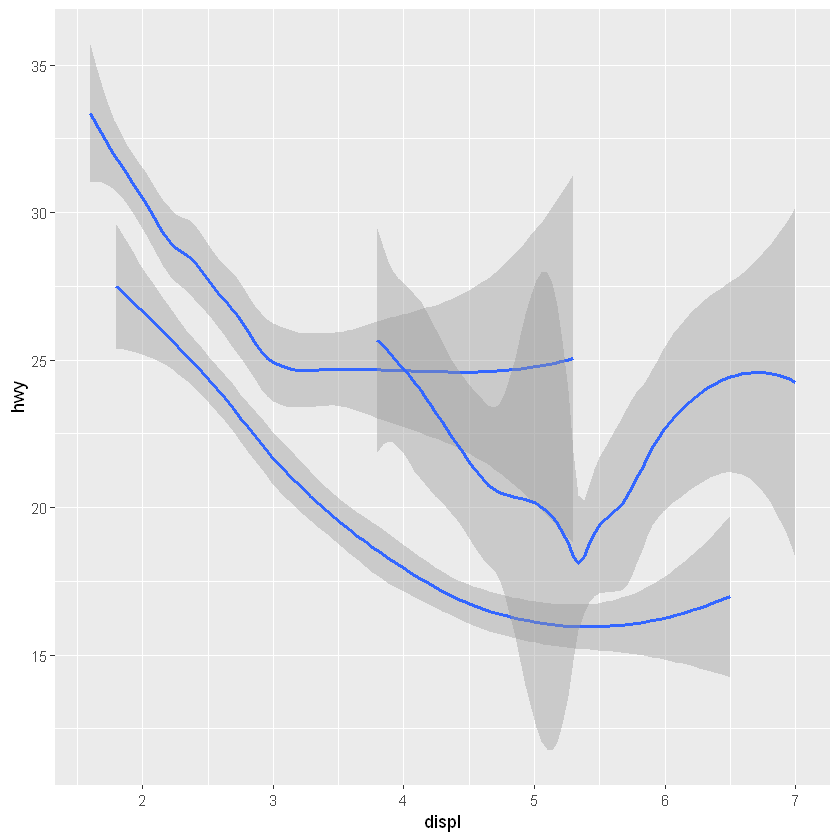

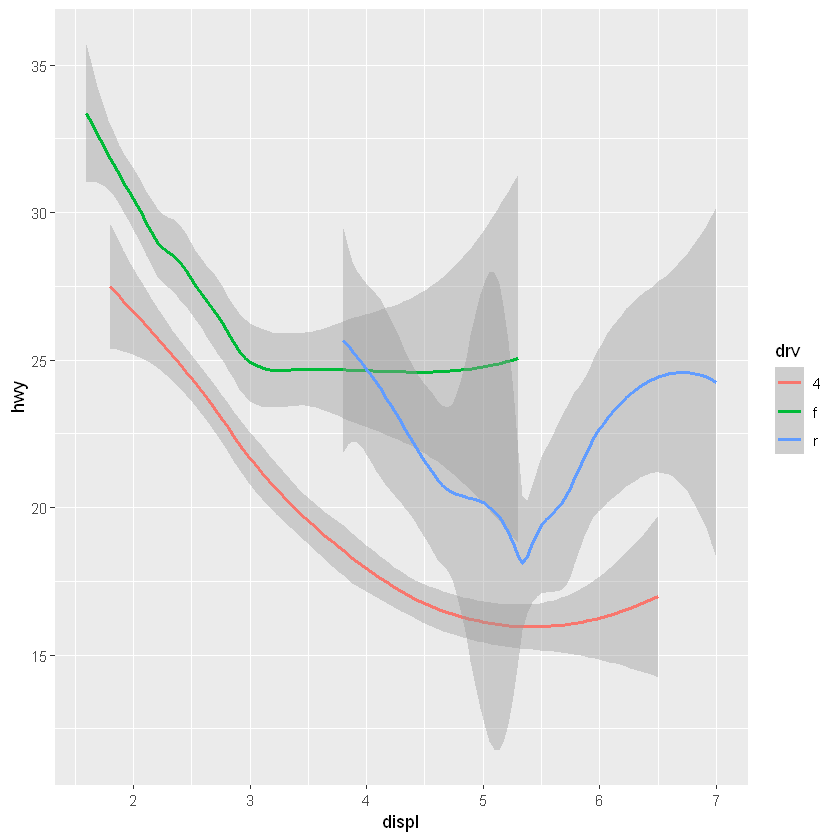

In [19]:
ggplot(data=mpg) +
    geom_smooth(mapping=aes(x=displ,y=hwy))
ggplot(data=mpg) +
    geom_smooth(mapping=aes(x=displ,y=hwy,group=drv))
ggplot(data=mpg) +
    geom_smooth(mapping=aes(x=displ,y=hwy,color=drv))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



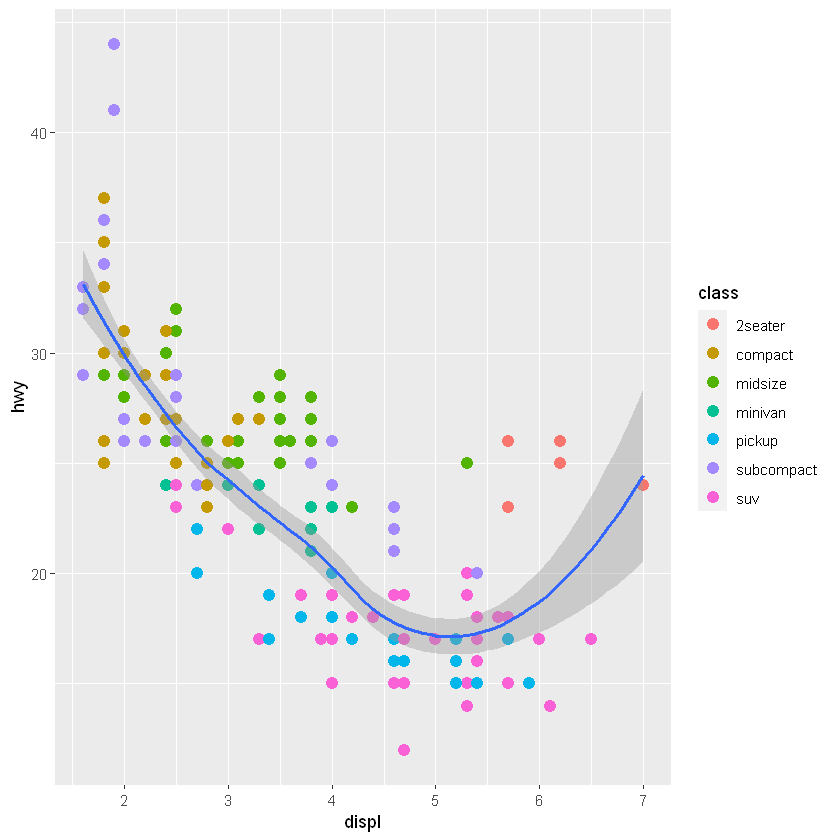

In [20]:
ggplot(data=mpg,mapping=aes(x=displ,y=hwy)) +
    geom_point(mapping=aes(color=class),size=3) +
    geom_smooth() # Smoothing line for all classes of cars

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



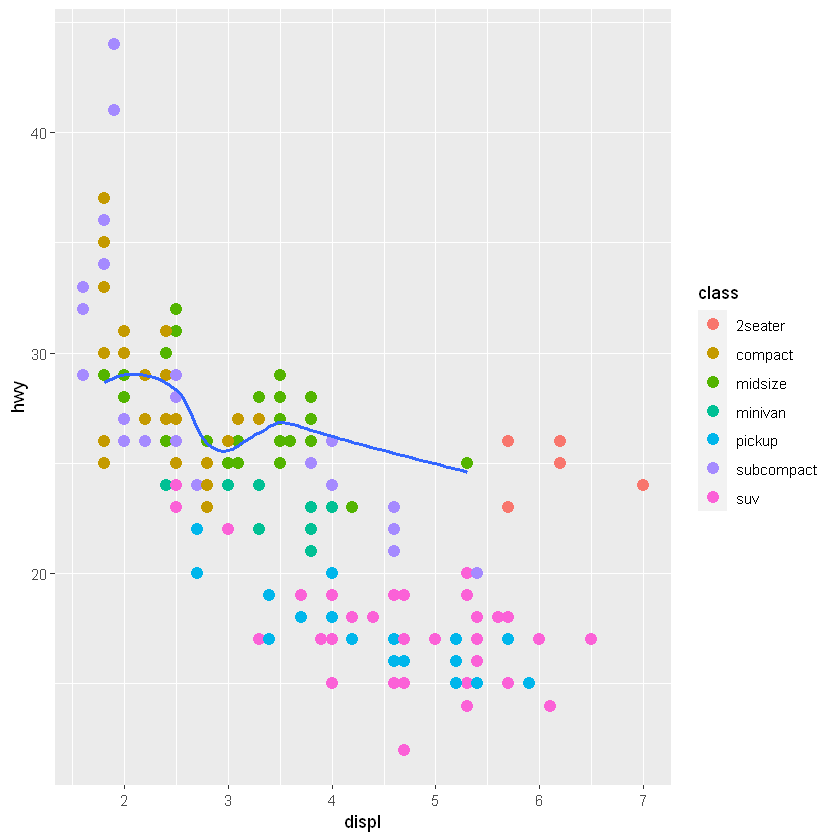

In [21]:
ggplot(data=mpg, mapping=aes(x=displ,y=hwy)) +
    geom_point(mapping=aes(color=class),size=3) +
    geom_smooth(data=filter(mpg,class=='midsize'),se=FALSE) # Line for midsize class

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



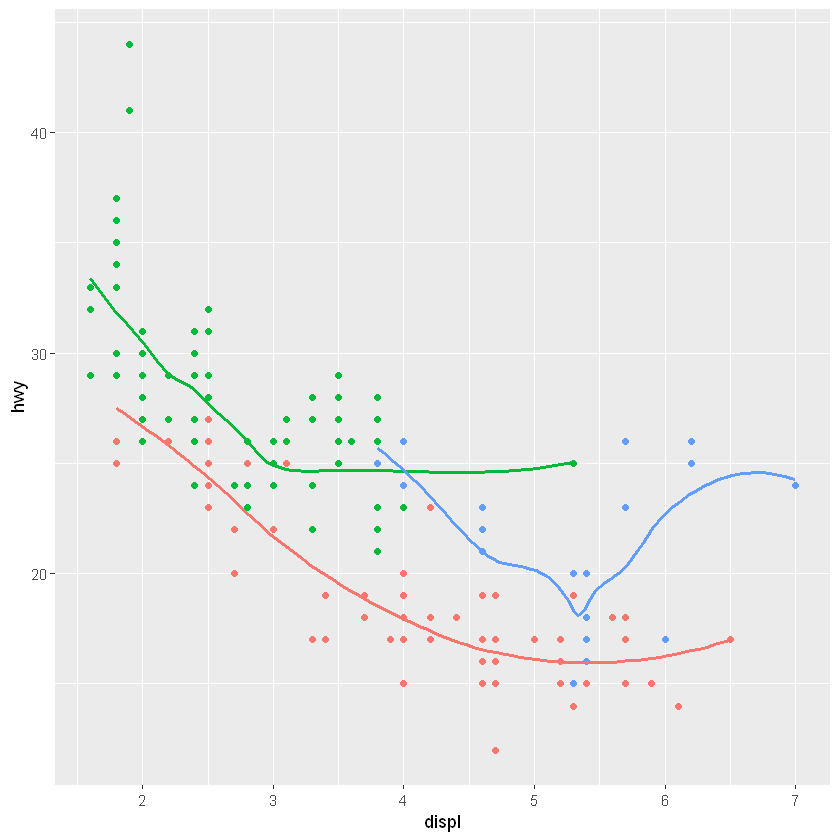

In [22]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy, color = drv)) + 
  geom_point(show.legend=FALSE) + 
  geom_smooth(se=FALSE,show.legend=FALSE)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



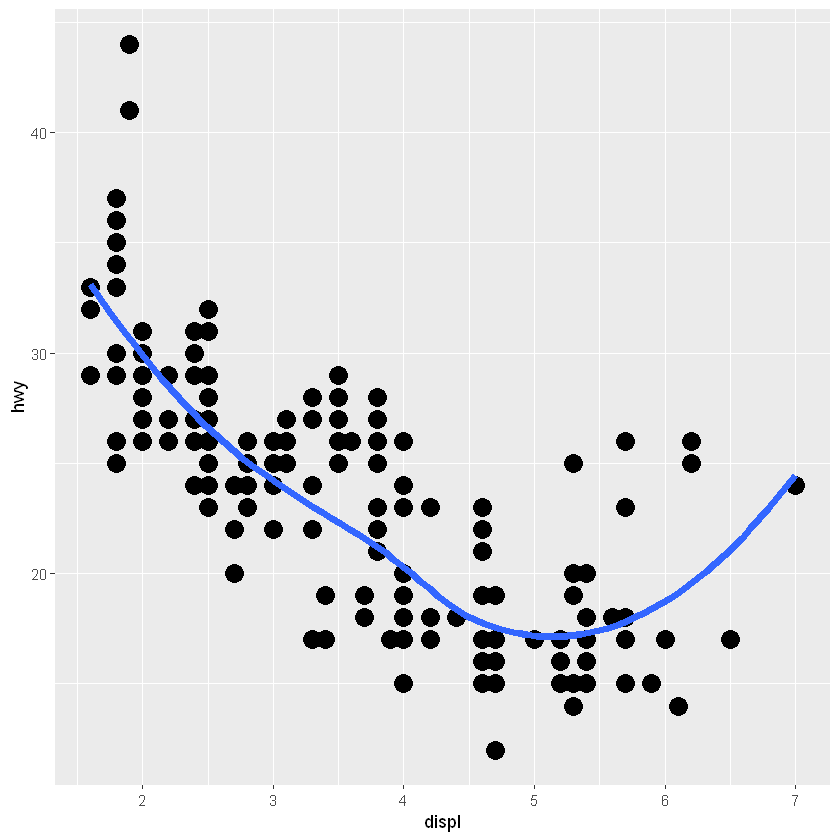

In [23]:
ggplot(mpg,aes(x=displ,y=hwy)) +
    geom_point(size=5) +
    geom_smooth(se=FALSE,size=2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



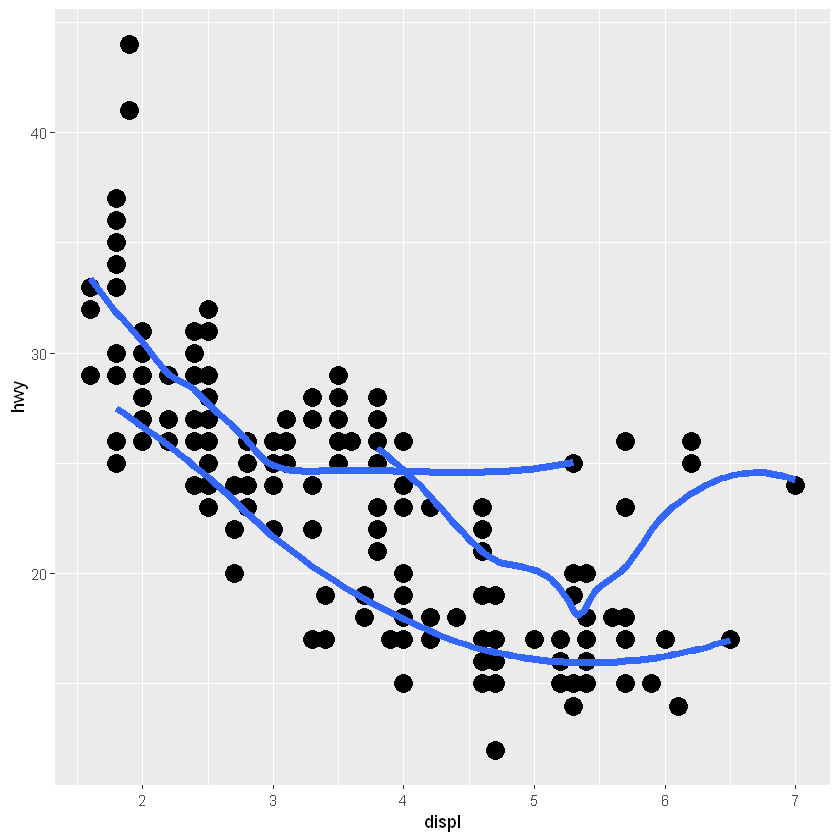

In [24]:
ggplot(mpg,aes(x=displ,y=hwy,group=drv)) +
    geom_point(size=5) +
    geom_smooth(se=FALSE,size=2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



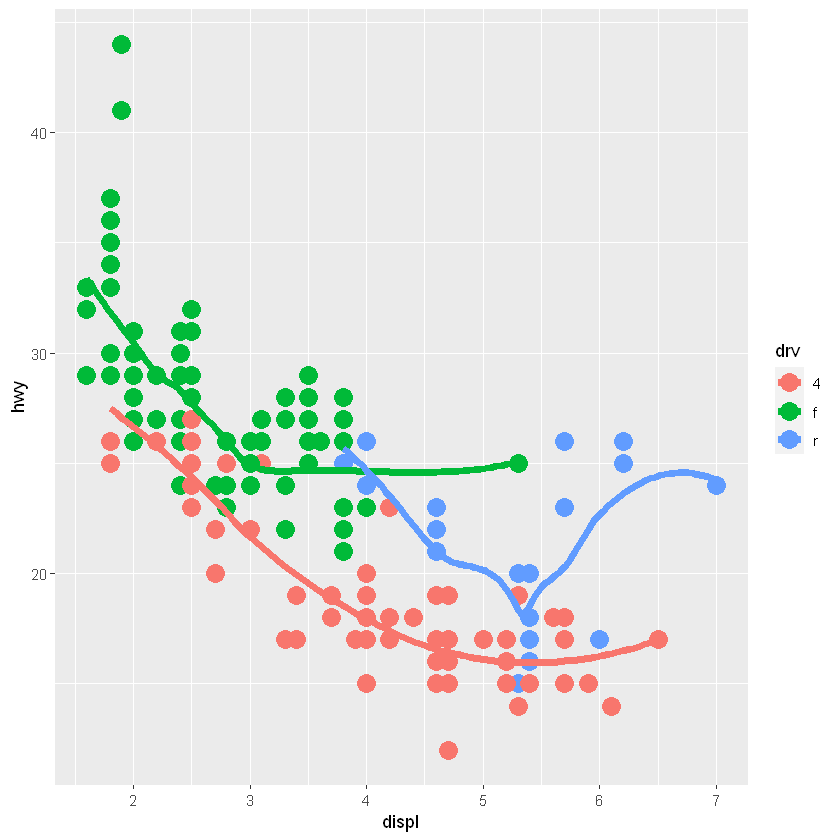

In [25]:
ggplot(mpg,aes(x=displ,y=hwy,color=drv)) +
    geom_point(size=5) +
    geom_smooth(se=FALSE,size=2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



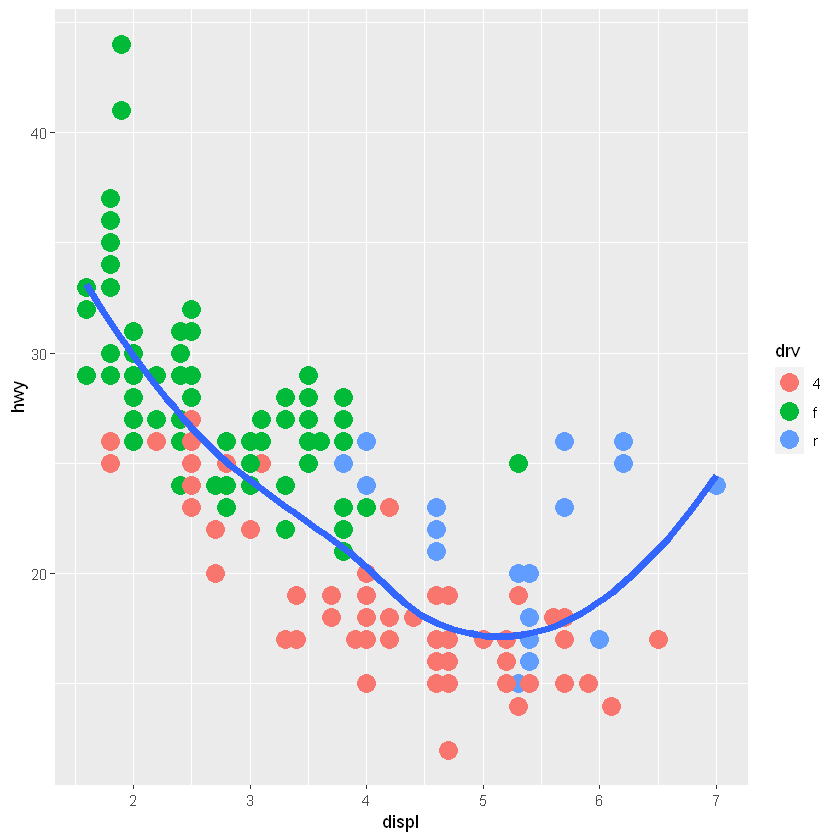

In [26]:
ggplot(mpg,aes(x=displ,y=hwy)) +
    geom_point(aes(color=drv),size=5) +
    geom_smooth(se=FALSE,size=2)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



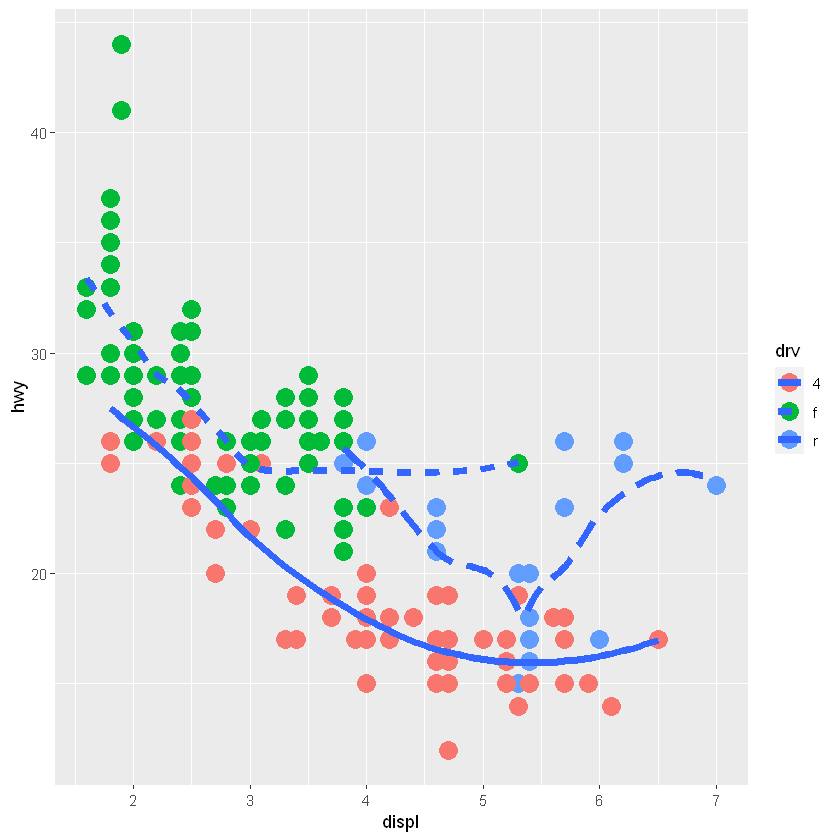

In [27]:
ggplot(mpg,aes(x=displ,y=hwy)) +
    geom_point(aes(color=drv),size=5) +
    geom_smooth(aes(linetype=drv),se=FALSE,size=2)

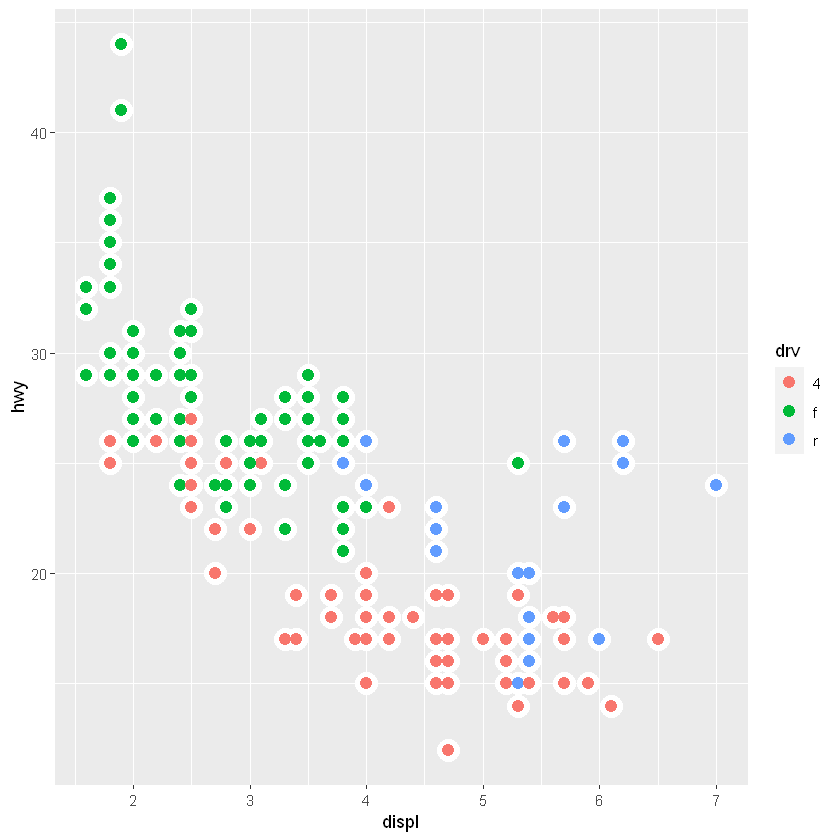

In [28]:
ggplot(mpg,aes(x=displ,y=hwy)) +
    geom_point(size=6,color="white") +
    geom_point(aes(color=drv),size=3)

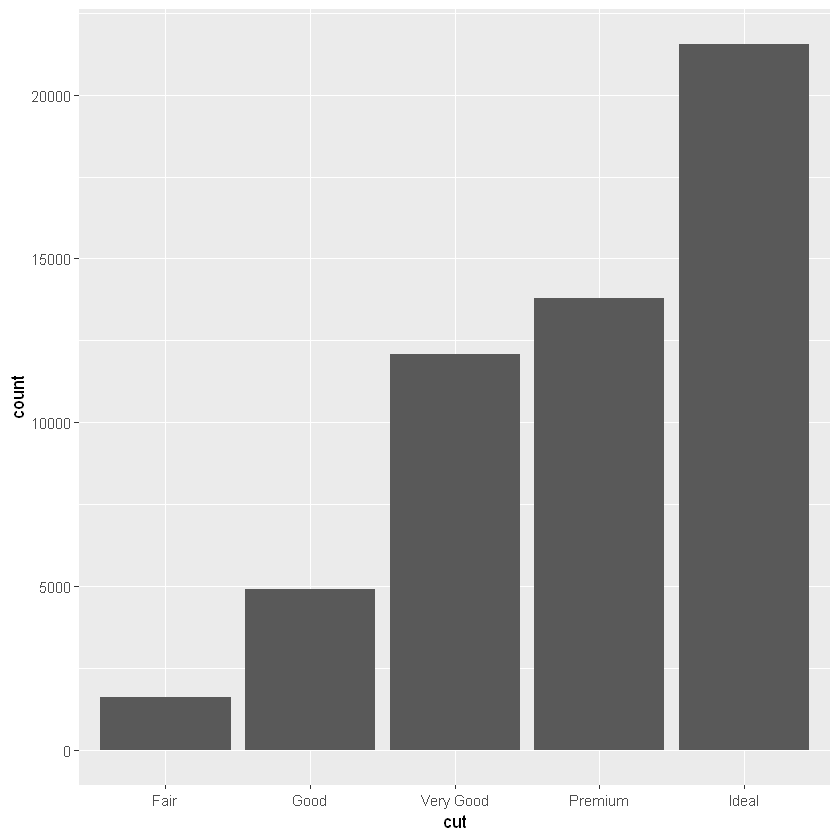

In [29]:
ggplot(diamonds) +
    geom_bar(mapping=aes(x=cut))

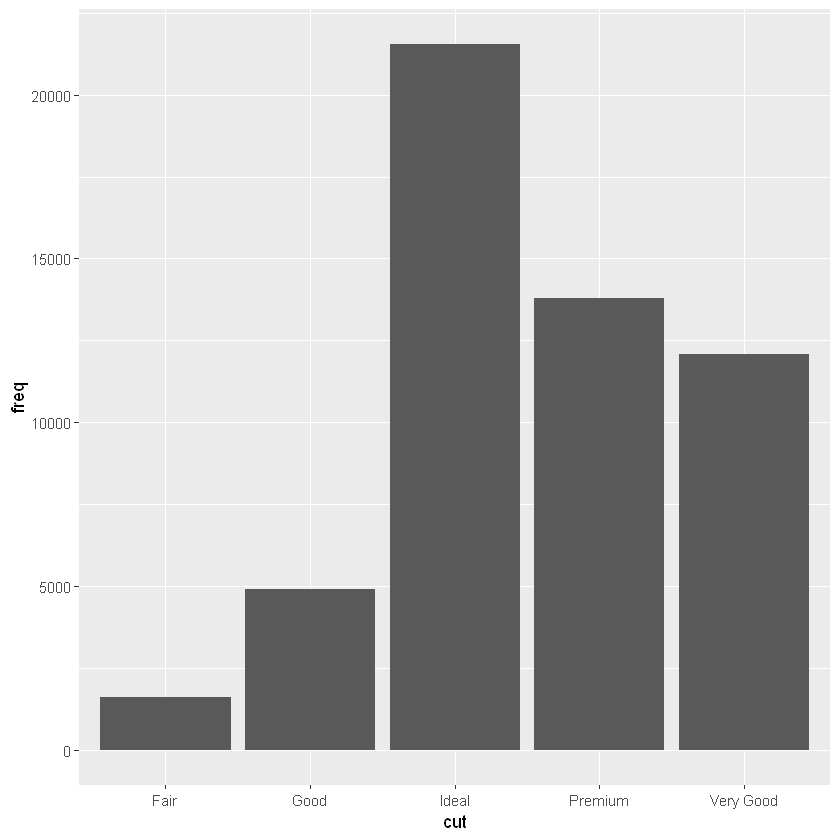

In [30]:
demo <- tribble(
  ~cut,         ~freq,
  "Fair",       1610,
  "Good",       4906,
  "Very Good",  12082,
  "Premium",    13791,
  "Ideal",      21551
)

ggplot(data=demo) +
    geom_bar(mapping=aes(x=cut,y=freq),stat='identity')

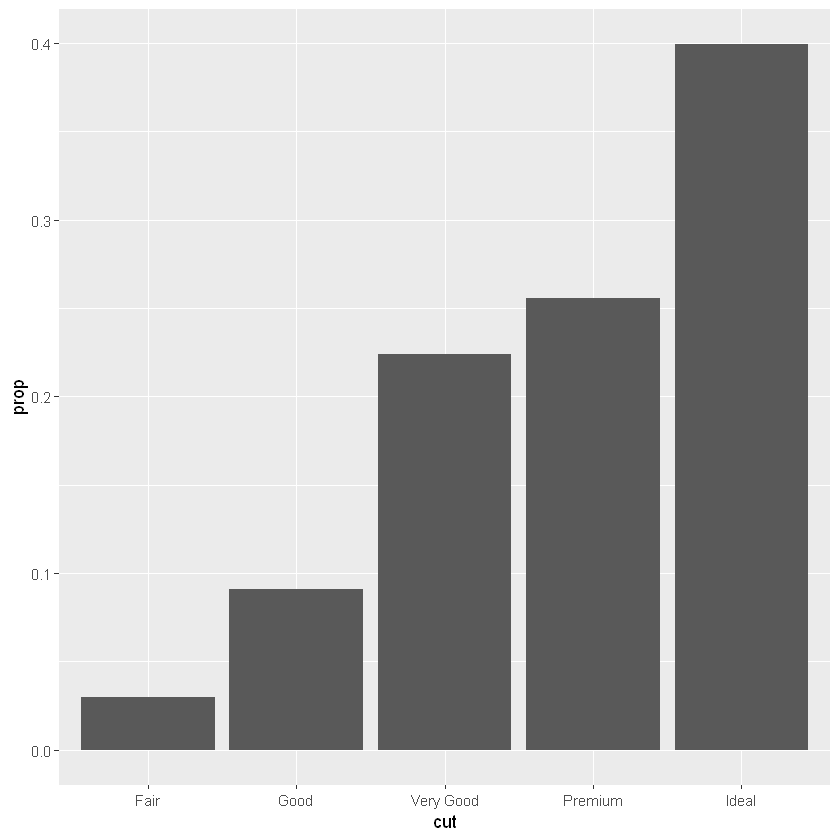

In [31]:
ggplot(diamonds) +
    geom_bar(aes(x=cut,y=stat(prop),group=1))

In [32]:
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


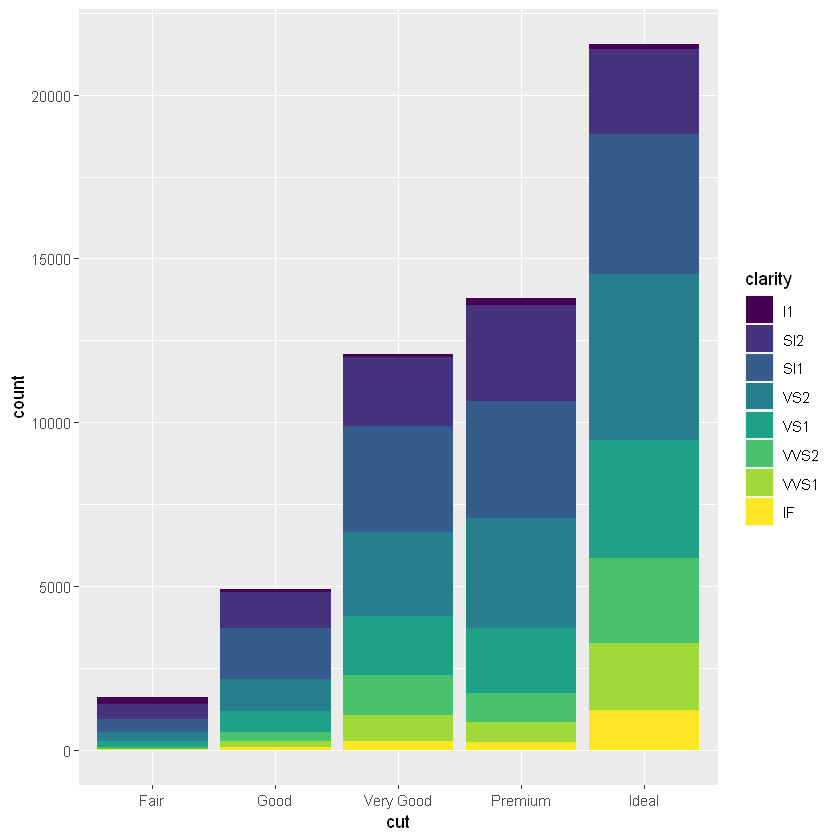

In [33]:
ggplot(data=diamonds) +
    geom_bar(mapping=aes(x=cut,fill=clarity))

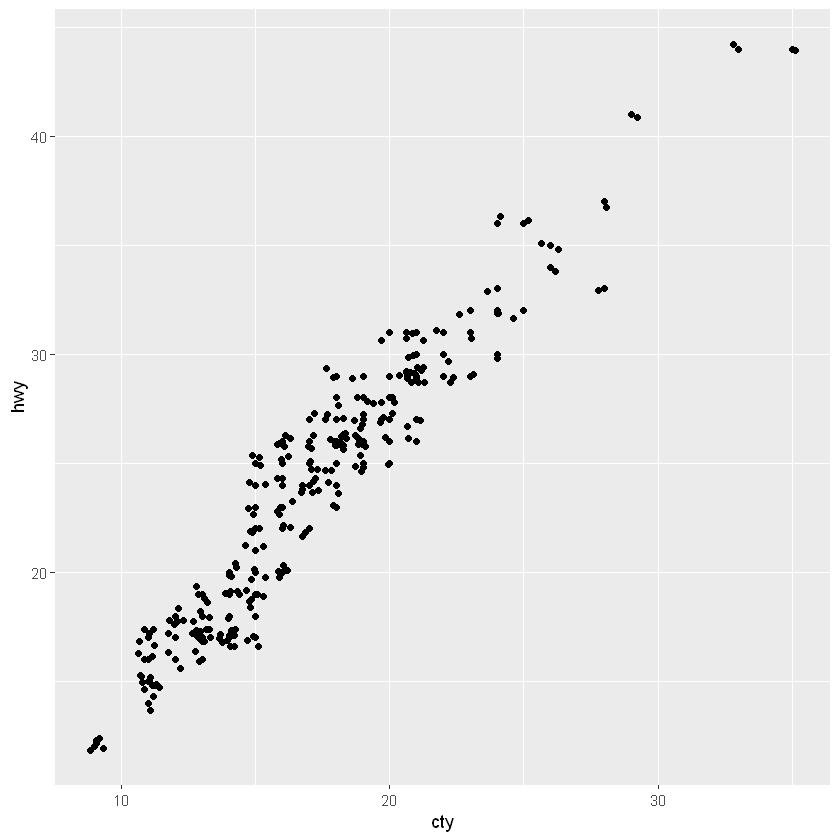

In [44]:
ggplot(data=mpg,mapping=aes(x=cty,y=hwy)) +
    geom_point() +
    geom_jitter()
# you can control the amount of jitter using
# the width and height parameters

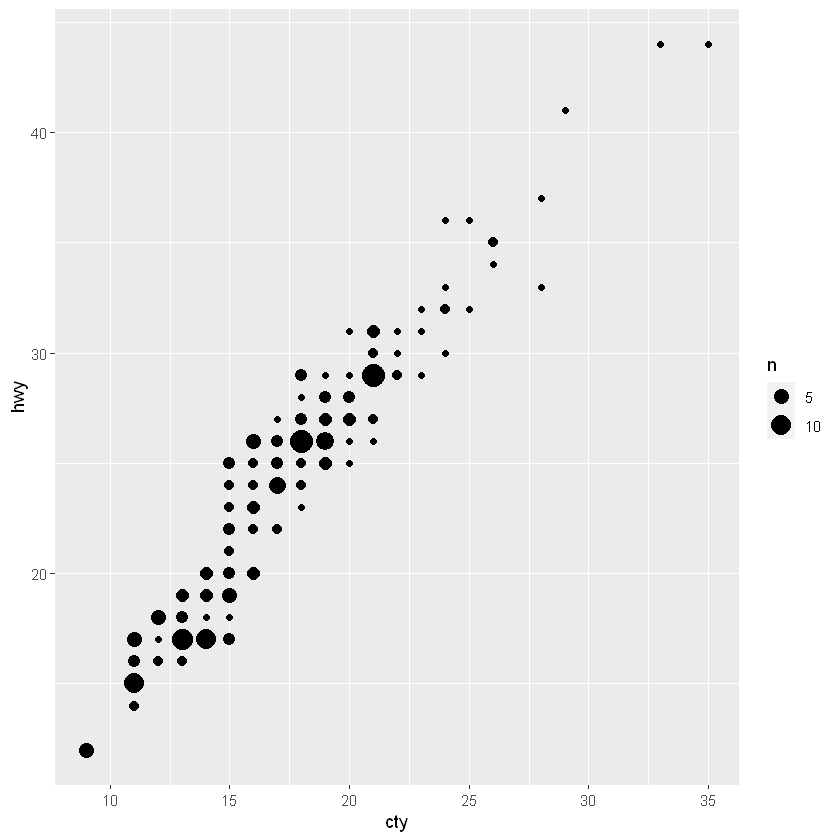

In [45]:
ggplot(data=mpg,mapping=aes(x=cty,y=hwy)) +
    geom_point() +
    geom_count()

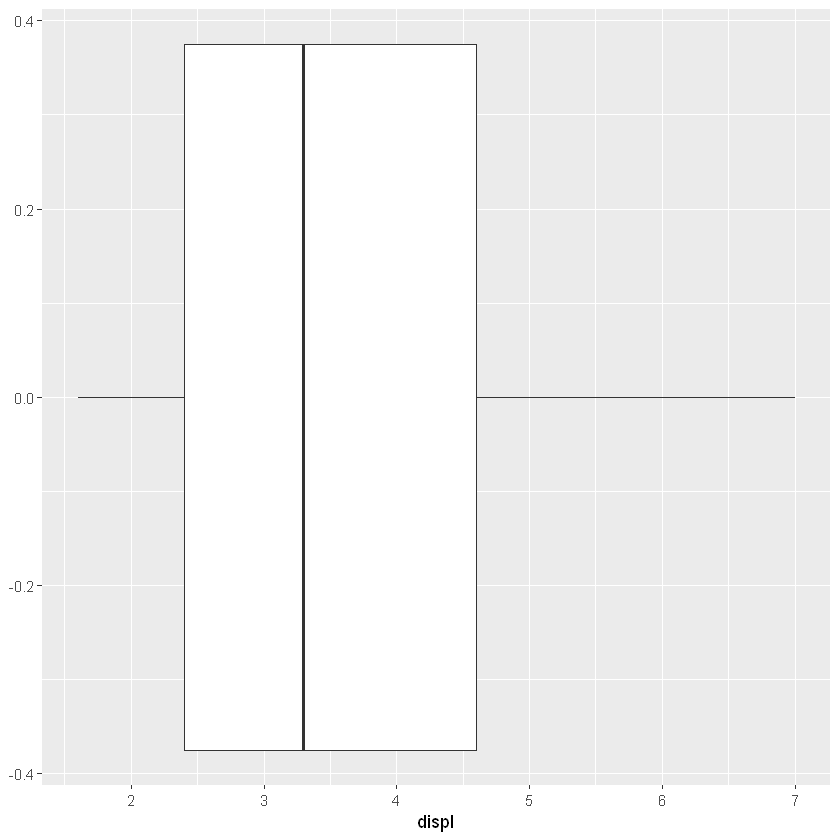

In [53]:
ggplot(data=mpg,mapping=aes(x=displ)) +
    geom_boxplot()

In [54]:
summary(mpg$displ)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.600   2.400   3.300   3.472   4.600   7.000 

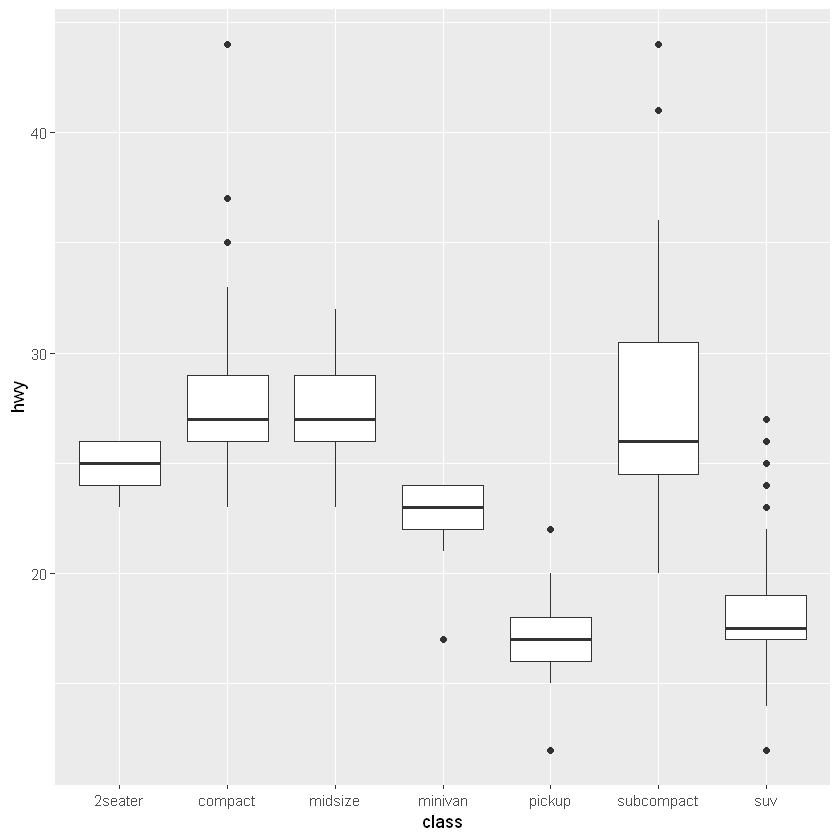

In [57]:
ggplot(data=mpg,mapping=aes(x=class,y=hwy)) +
    geom_boxplot()

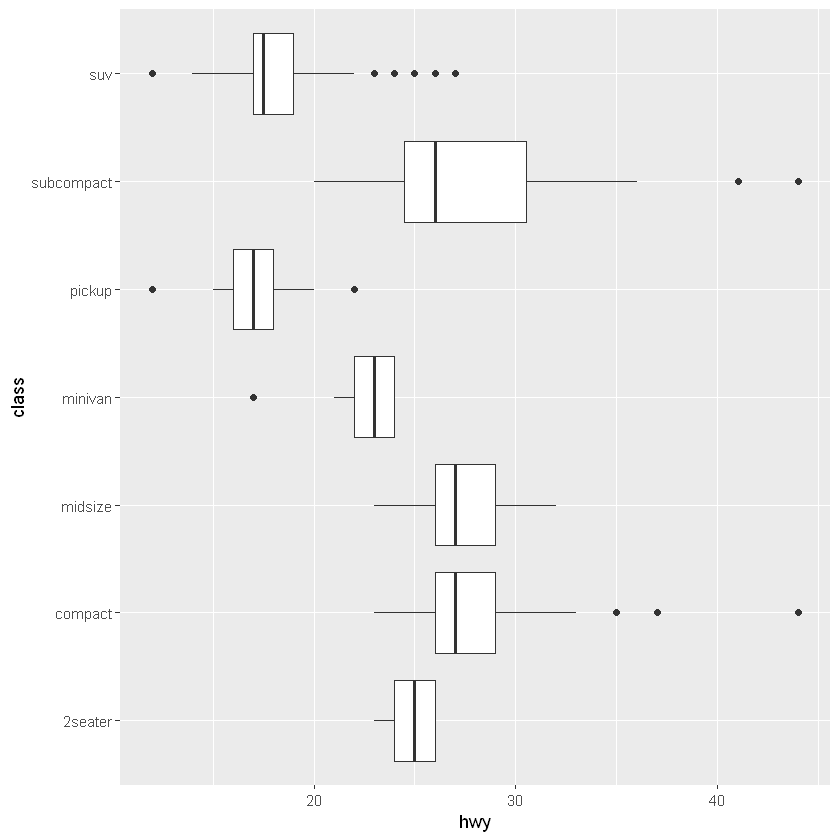

In [62]:
ggplot(data=mpg,mapping=aes(x=class,y=hwy)) +
    geom_boxplot() +
    coord_flip()

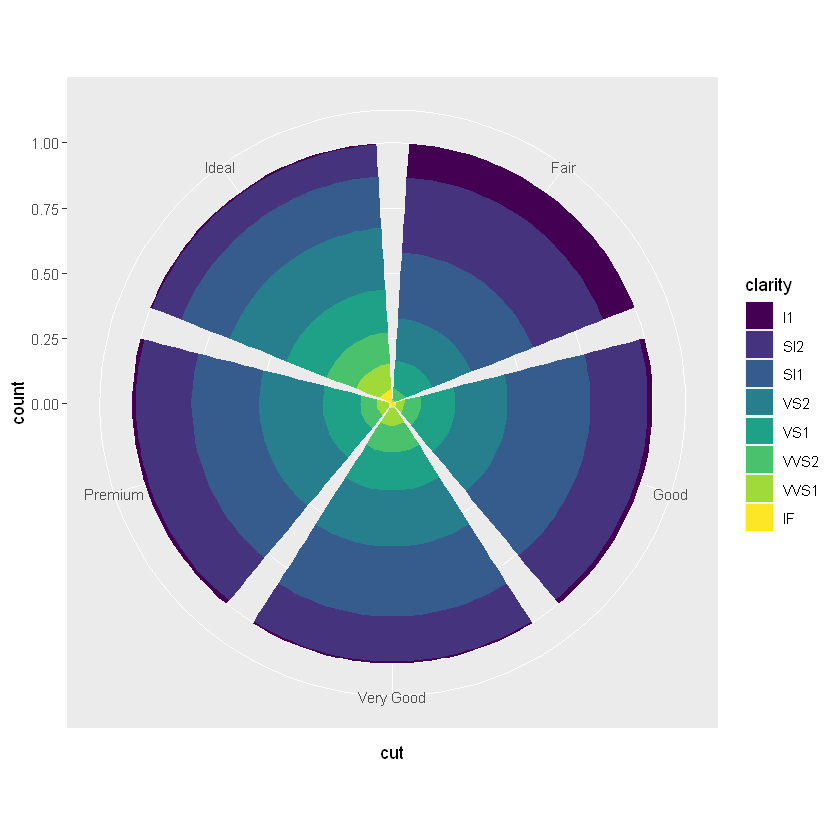

In [69]:
ggplot(data=diamonds,mapping=aes(x=cut,fill=clarity)) +
    geom_bar(position='fill') +
    coord_polar()

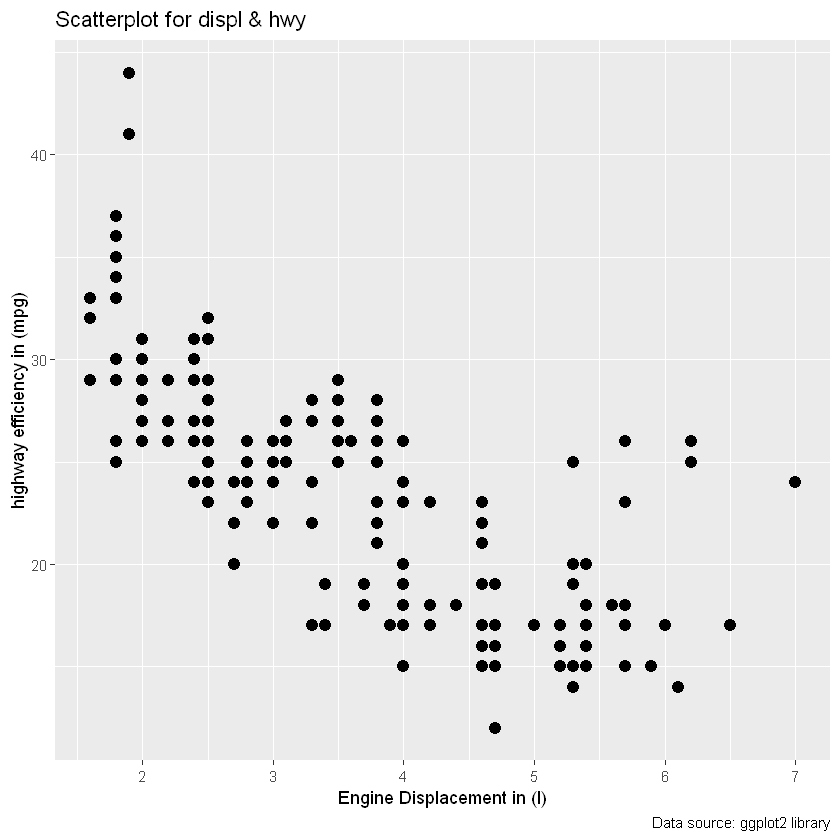

In [78]:
ggplot(data=mpg,mapping=aes(x=displ,y=hwy)) +
    geom_point(size=3) +
    labs(title='Scatterplot for displ & hwy',
         x='Engine Displacement in (l)',
         y='highway efficiency in (mpg)',
         caption='Data source: ggplot2 library')

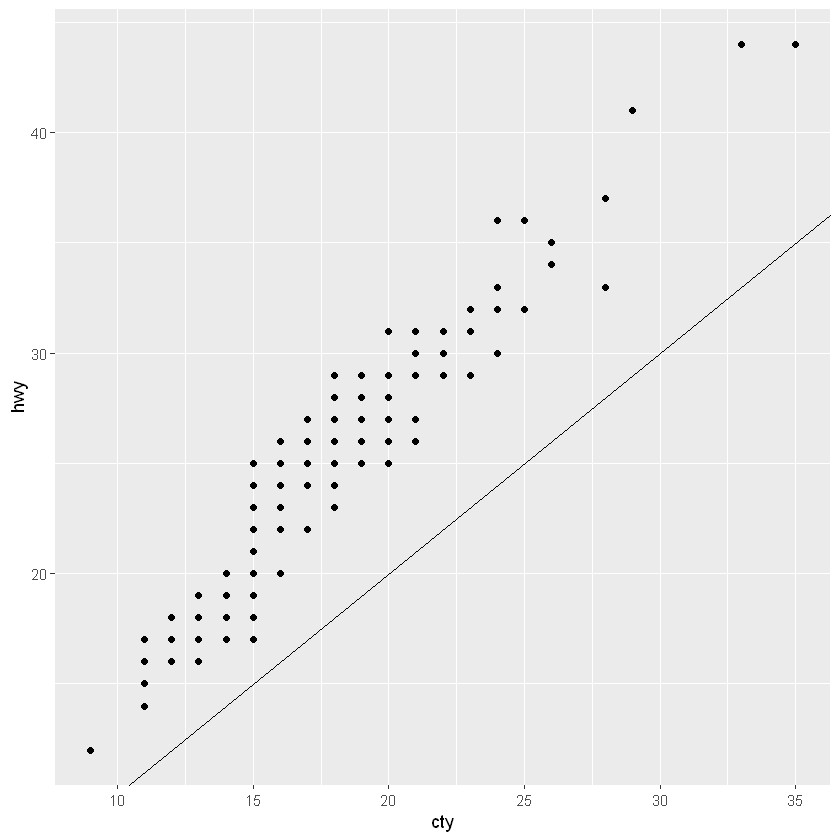

In [85]:
ggplot(mpg,aes(cty,hwy)) +
    geom_point() +
    geom_abline()

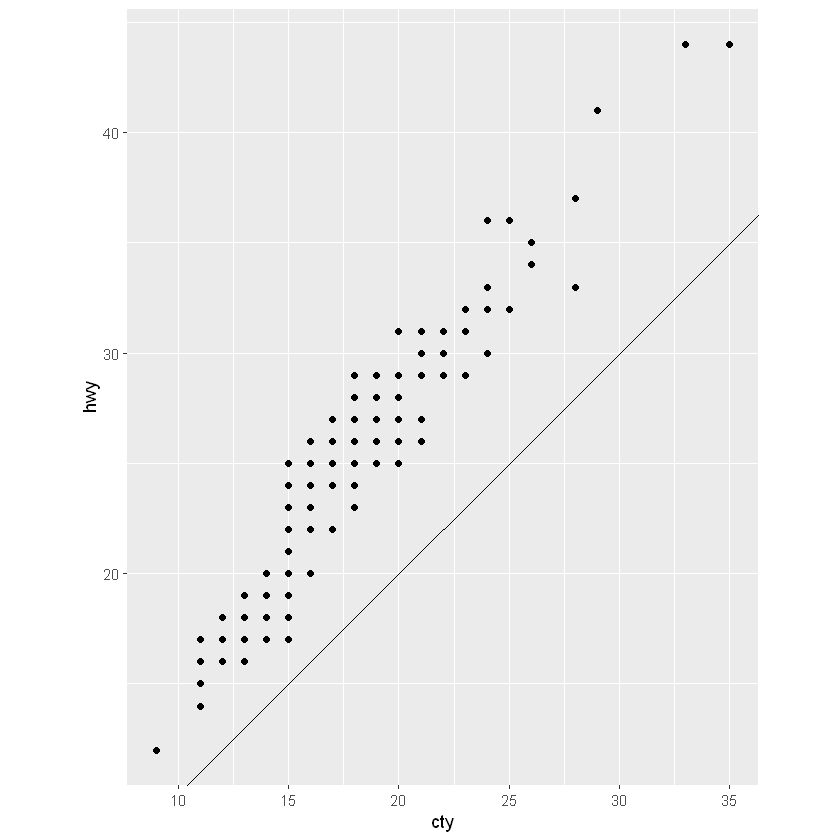

In [86]:
ggplot(mpg,aes(cty,hwy)) +
    geom_point() +
    geom_abline() +
    coord_fixed()